In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\UROP-1100-21S\source_bias\labelled_news_data.csv")
df.head()

,id,title,publication,author,date,year,month,url,content,media_bias,label
0,82596,Donald Trump blasts Bill Clinton as ’one of th...,Fox News,Christopher Snyder,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,Donald Trump launched new attacks against Bil...,right,POLITICS
1,82600,"Drop in oil prices rocks producer states, trig...",Fox News,Brooke Singman,2016-01-01,2016.0,1.0,https://web.archive.org/web/20160102032517/htt...,The plunge in oil prices has given a needed b...,right,BUSINESS
2,82605,Open carry comes to Texas: Why the Lone Star s...,Fox News,John R Lott,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160102032517/htt...,"With about 900, 000 concealed handgun permit ...",right,POLITICS
3,82621,GOP field rips Obama’s move toward executive a...,Fox News,Joseph Weber,2016-01-03,2016.0,1.0,https://web.archive.org/web/20160104001421/htt...,Republican presidential candidates are attack...,right,POLITICS
4,82630,President Obama wants to disarm America,Fox News,Todd Starnes,2016-01-04,2016.0,1.0,https://web.archive.org/web/20160105014544/htt...,President Obama is plotting with his attorney...,right,POLITICS


In [3]:
set(df.label)

{'ARTS',
 'ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COLLEGE',
 'COMEDY',
 'CRIME',
 'CULTURE & ARTS',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'GREEN',
 'HEALTHY LIVING',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTING',
 'PARENTS',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE',
 'STYLE & BEAUTY',
 'TASTE',
 'TECH',
 'THE WORLDPOST',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST'}

In [34]:
politics_sample = df[df['label'] == "POLITICS"].sample(50).content.values
business_sample = df[df['label'] == "BUSINESS"].sample(50).content.values
tech_sample = df[df['label'] == "TECH"].sample(50).content.values

In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')


In [35]:
embeddings = model.encode(list(politics_sample)+list(business_sample)+list(tech_sample))
embeddings

array([[-0.01898056,  0.08467138,  0.00275475, ...,  0.00613301,
         0.01890741, -0.0081968 ],
       [ 0.00089839,  0.04329651, -0.00596803, ..., -0.01337541,
        -0.01536281, -0.01818991],
       [-0.05152811,  0.09047963, -0.00457463, ...,  0.00202574,
        -0.01087255, -0.00357832],
       ...,
       [ 0.06638912,  0.08473746, -0.0076033 , ...,  0.02972711,
         0.00929566,  0.02197728],
       [ 0.02403459, -0.01064413, -0.03717831, ..., -0.03932115,
        -0.03456412, -0.01124406],
       [ 0.00054292,  0.03206341, -0.03935282, ..., -0.02215665,
        -0.02025132, -0.0239566 ]], dtype=float32)

In [36]:
embeddings.shape

(150, 768)

In [37]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(embeddings)
X_embedded.shape

(150, 2)

In [38]:
X_embedded[:5]

array([[-5.6896586,  7.907376 ],
       [ 1.7155364,  5.1301146],
       [-3.038746 ,  5.885069 ],
       [-2.2449765,  7.736611 ],
       [-1.7029197,  4.229356 ]], dtype=float32)

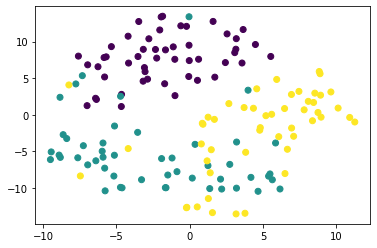

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:,1], c=[0]*50+[1]*50+[2]*50)

In [41]:
left_sample = df[(df['label'] == "POLITICS") & (df['media_bias'] == "left")].sample(100).content.values
right_sample = df[(df['label'] == "POLITICS") & (df['media_bias'] == "right")].sample(100).content.values

In [42]:
embeddings = model.encode(list(left_sample)+list(right_sample))
embeddings

array([[-0.0434307 ,  0.09556523,  0.00358982, ...,  0.02786065,
         0.00599544, -0.00514186],
       [ 0.00432267,  0.07001598,  0.02752157, ...,  0.01161238,
        -0.00359657,  0.00034127],
       [-0.01711002,  0.06907184,  0.02076242, ...,  0.0147229 ,
        -0.03745688, -0.01601799],
       ...,
       [-0.00995708,  0.11145946,  0.01737575, ..., -0.03922585,
        -0.03732269,  0.03926647],
       [ 0.02356899,  0.13687105,  0.00387393, ...,  0.0133651 ,
        -0.05997062, -0.02299663],
       [-0.06970847,  0.08175346,  0.0685036 , ...,  0.0011739 ,
         0.00606143,  0.01039716]], dtype=float32)

In [43]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(embeddings)
X_embedded.shape

(200, 2)

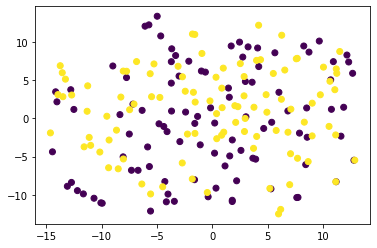

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:,1], c=[0]*100+[1]*100)